In [4]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)
# %cd /content/drive/MyDrive/Colab Notebooks/Disertasi-Ahmad-Rofiqul/002.Experiment_SWI_16052024/

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.svm import OneClassSVM

In [6]:
# Load the dataset
file_path = '01.Dataset-Rofiqul/012_N2O_Soft_Voting_agriculture_dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset for review
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 2246 non-null   object 
 1   Year                 2246 non-null   float64
 2   Experiment           2246 non-null   object 
 3   DataUse              2246 non-null   object 
 4   Replication          2246 non-null   object 
 5   Month                2246 non-null   object 
 6   Vegetation           2246 non-null   object 
 7   VegType              2246 non-null   object 
 8   N2O                  2246 non-null   float64
 9   N_rate               2246 non-null   float64
 10  PP2                  2246 non-null   float64
 11  PP7                  2246 non-null   float64
 12  AirT                 2246 non-null   float64
 13  DAF_TD               2246 non-null   float64
 14  DAF_SD               2246 non-null   float64
 15  WFPS25cm             2246 non-null   f

(      Date      Year Experiment   DataUse Replication     Month Vegetation  \
 0   2/9/12  0.020682   BCSE_KBS  Building          R1  February       Corn   
 1  2/10/12  0.020682   BCSE_KBS  Building          R1  February       Corn   
 2  2/18/12  0.020682   BCSE_KBS  Building          R1  February       Corn   
 3  2/19/12  0.020682   BCSE_KBS  Building          R1  February       Corn   
 4  3/16/12  0.020682   BCSE_KBS  Building          R1     March       Corn   
 
   VegType       N2O    N_rate  ...       SOM  Outlier  IF_Outlier  \
 0  Annual -0.125408  0.481233  ... -0.642242        1           1   
 1  Annual -0.185324  0.481233  ... -0.642242        1           1   
 2  Annual -0.137842  0.481233  ... -0.642242        1           1   
 3  Annual -0.144855  0.481233  ... -0.642242        1           1   
 4  Annual -0.158726  0.481233  ... -0.642242        1           1   
 
    DBSCAN_Outlier  OCSVM_Outlier     IF_Label  DBSCAN_Label  OCSVM_Label  \
 0               0       

##  Missing Value Handling

In [7]:
# missing_values_count = data.isna().sum()
# missing_values_count

## Prepare Train Test Split

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
# Encode categorical variables if any
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Split the data into features and target variable
X = data.drop(columns=['N2O'])
y = data['N2O']


## First Initial Training Testing Data Split and XGBoost Prediction

In [ ]:
#MANUAL TESTING TRAINING SPLIT
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1796, 29) (450, 29) (1796,) (450,)


In [ ]:
# Initialize the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 0.5149188796794761
Root Mean Squared Error: 0.7175784832890937


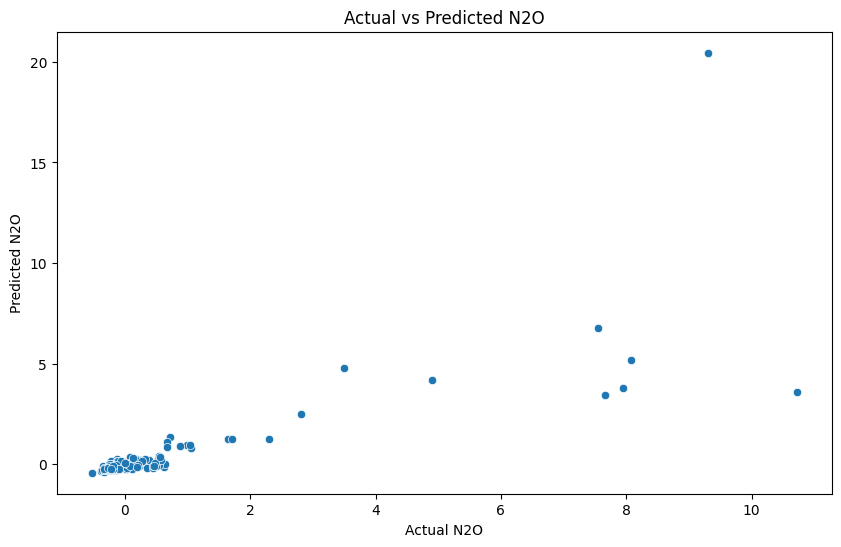

<Figure size 1000x600 with 0 Axes>

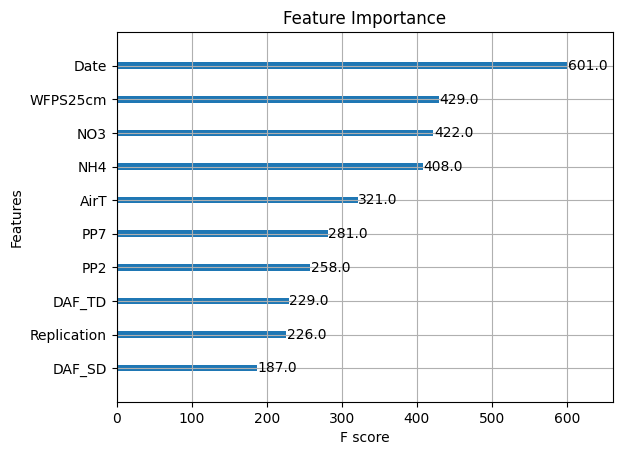

In [ ]:
# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual N2O')
plt.ylabel('Predicted N2O')
plt.title('Actual vs Predicted N2O')
plt.show()

# Plot feature importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(model, max_num_features=10)
plt.title('Feature Importance')
plt.show()

Test Size: 0.25
Mean Squared Error: 0.4098570139643107
Root Mean Squared Error: 0.6402007606714558
Mean Absolute Error: 0.14119190652898125
R-squared: 0.5712032047811703


/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


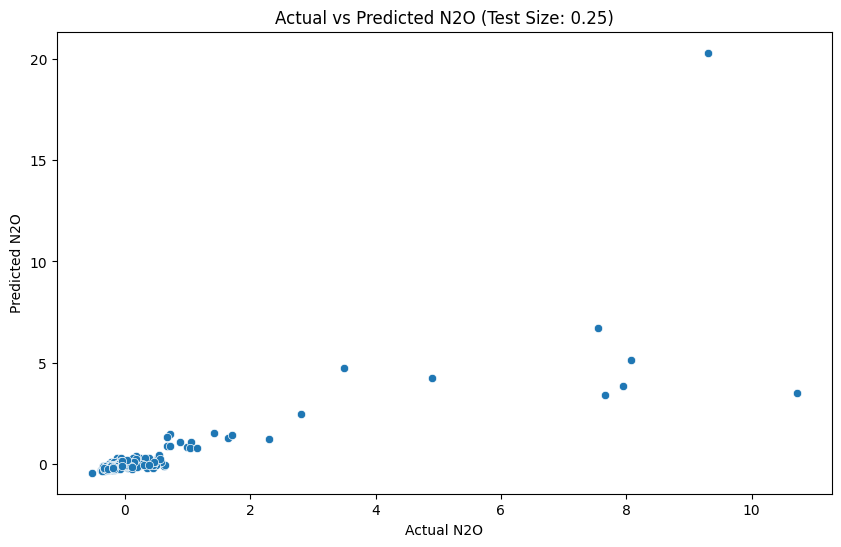

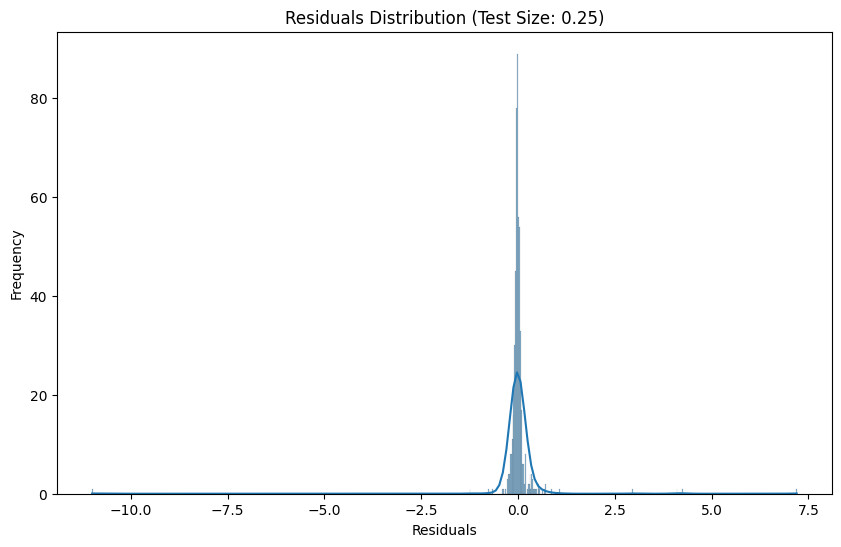

Test Size: 0.3
Mean Squared Error: 0.8040487047783644
Root Mean Squared Error: 0.8966876294331066
Mean Absolute Error: 0.16796820940932417
R-squared: 0.08417399424875849


/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


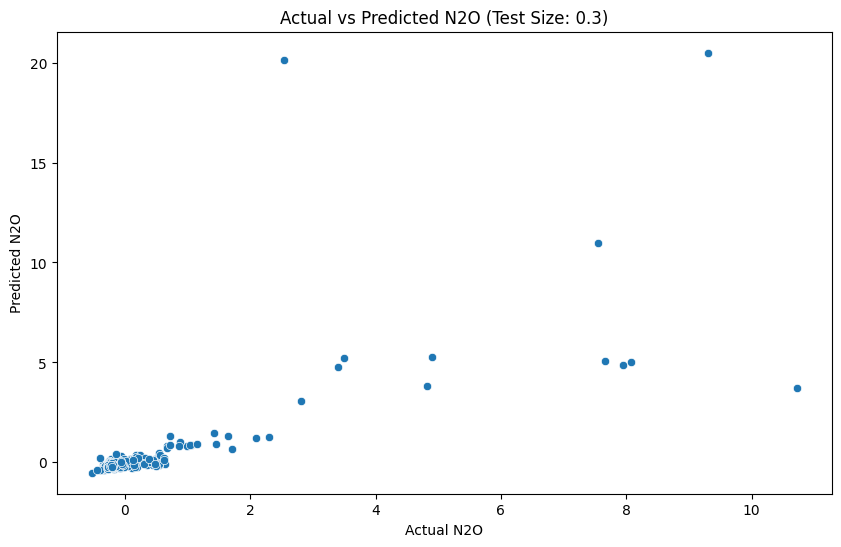

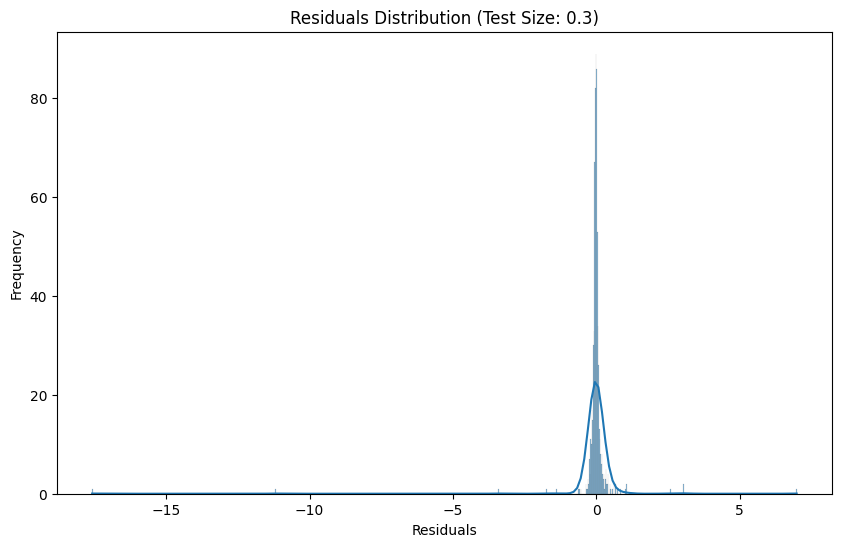

Test Size: 0.35
Mean Squared Error: 0.7960632838229277
Root Mean Squared Error: 0.8922237857303109
Mean Absolute Error: 0.17723168987118126
R-squared: 0.44242054699472877


/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


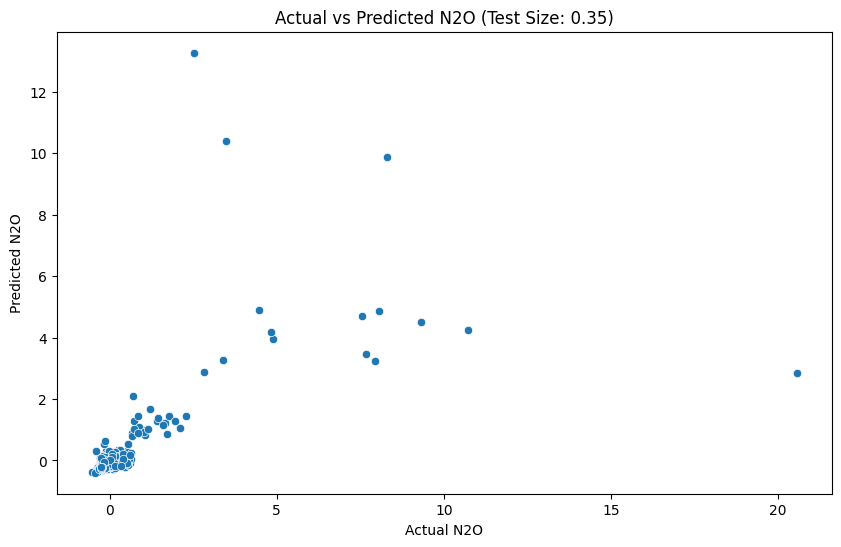

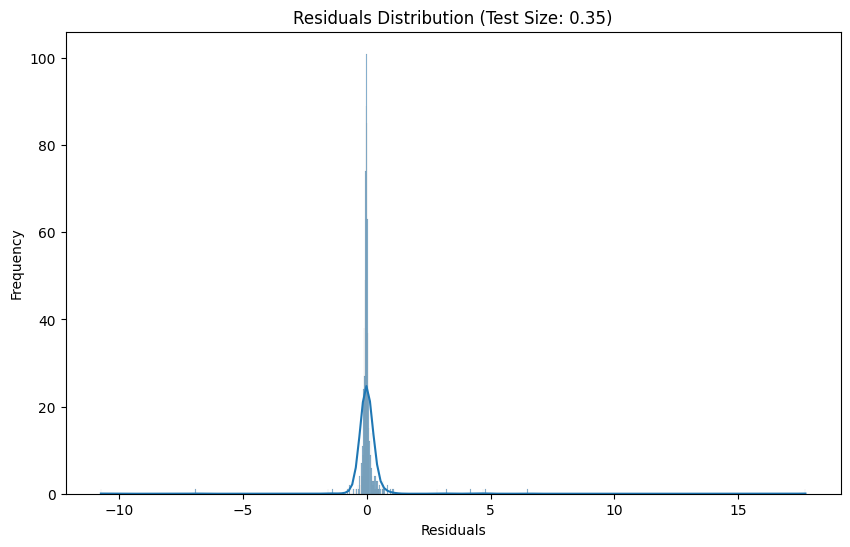

Test Size: 0.25
Mean Squared Error: 0.4098570139643107
Root Mean Squared Error: 0.6402007606714558
Mean Absolute Error: 0.14119190652898125
R-squared: 0.5712032047811703


Test Size: 0.3
Mean Squared Error: 0.8040487047783644
Root Mean Squared Error: 0.8966876294331066
Mean Absolute Error: 0.16796820940932417
R-squared: 0.08417399424875849


Test Size: 0.35
Mean Squared Error: 0.7960632838229277
Root Mean Squared Error: 0.8922237857303109
Mean Absolute Error: 0.17723168987118126
R-squared: 0.44242054699472877




NameError: name 'train_evaluate_tuning' is not defined

In [14]:
test_sizes = [0.2,0.25, 0.3, 0.35]
results = {}
# Initialize an empty list to store results
evaluation = []

def train_and_evaluate(test_size):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Initialize the XGBoost model
    model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model's performance
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Test Size: {test_size}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R-squared: {r2}")

    # Plot the actual vs predicted values
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.xlabel('Actual N2O')
    plt.ylabel('Predicted N2O')
    plt.title(f'Actual vs Predicted N2O (Test Size: {test_size})')
    plt.show()

    # Plot residuals
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title(f'Residuals Distribution (Test Size: {test_size})')
    plt.show()

    return model, mse, rmse, mae, r2

for test_size in test_sizes:
    model, mse, rmse, mae, r2 = train_and_evaluate(test_size)
    results[test_size] = {'model': model, 'mse': mse, 'rmse': rmse, 'mae': mae, 'r2': r2}
    evaluation.append({
        'test_size': test_size,
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2': r2
    })
# Convert results to a DataFrame
eval_df = pd.DataFrame(evaluation)

# Save the results to a CSV file
eval_df.to_csv('01.Dataset-Rofiqul/014_xgboost_evaluation_results.csv', index=False)


# Display the results
for test_size, metrics in results.items():
    print(f"Test Size: {test_size}")
    print(f"Mean Squared Error: {metrics['mse']}")
    print(f"Root Mean Squared Error: {metrics['rmse']}")
    print(f"Mean Absolute Error: {metrics['mae']}")
    print(f"R-squared: {metrics['r2']}")
    print("\n")



""" # # Loop through each test size, train and evaluate the model, and store the results
for test_size in test_sizes:
    result = train_evaluate_tuning(test_size)
    results.append(result)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Save the results to a CSV file
results_df.to_csv('01.Dataset-Rofiqul/015_xgboost_evaluation_results.csv', index=False) """

# Display the results DataFrame
# print(results_df)

## Define GridSearch and RandomSearch Optimization Parameters

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'min_child_weight': [1, 2, 3, 4, 5, 6]
}


In [ ]:

#Implement a function to perform hyperparameter tuning using GridSearchCV and RandomizedSearchCV

def hyperparameter_tuning(X_train, y_train, method='grid'):
    # Initialize the XGBoost model
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

    if method == 'grid':
        # GridSearchCV
        grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
    elif method == 'random':
        # RandomizedSearchCV
        random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=100, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1, random_state=42)
        random_search.fit(X_train, y_train)
        best_model = random_search.best_estimator_
        best_params = random_search.best_params_

    return best_model, best_params

    Train and evaluate the model for different test sizes

python

def train_evaluate_tuning(test_size, tuning_method='grid'):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Perform hyperparameter tuning
    best_model, best_params = hyperparameter_tuning(X_train, y_train, method=tuning_method)

    # Make predictions on the test set
    y_pred = best_model.predict(X_test)

    # Evaluate the model's performance
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Test Size: {test_size}, Tuning Method: {tuning_method}")
    print(f"Best Parameters: {best_params}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R-squared: {r2}")

    # Plot the actual vs predicted values
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.xlabel('Actual N2O')
    plt.ylabel('Predicted N2O')
    plt.title(f'Actual vs Predicted N2O (Test Size: {test_size}, Tuning Method: {tuning_method})')
    plt.show()

    # Plot residuals
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title(f'Residuals Distribution (Test Size: {test_size}, Tuning Method: {tuning_method})')
    plt.show()

    return best_model, mse, rmse, mae, r2

    Compare the results across different test sizes and tuning methods

python

test_sizes = [0.2, 0.25, 0.3, 0.35]
tuning_methods = ['grid', 'random']
results = {}

for test_size in test_sizes:
    for method in tuning_methods:
        model, mse, rmse, mae, r2 = train_evaluate_tuning(test_size, tuning_method=method)
        results[(test_size, method)] = {'model': model, 'mse': mse, 'rmse': rmse, 'mae': mae, 'r2': r2}

# Display the results
for key, metrics in results.items():
    test_size, method = key
    print(f"Test Size: {test_size}, Tuning Method: {method}")
    print(f"Mean Squared Error: {metrics['mse']}")
    print(f"Root Mean Squared Error: {metrics['rmse']}")
    print(f"Mean Absolute Error: {metrics['mae']}")
    print(f"R-squared: {metrics['r2']}")
    print("\n")

Instructions:

    Replace the file path with the actual path to your CSV file.
    Run the code in your local Python environment step-by-step.
    Ensure that you have the required libraries installed (pandas, xgboost, sklearn, matplotlib, seaborn).

This code will train the XGBoost model with different test sizes and hyperparameter tuning methods (GridSearchCV and RandomizedSearchCV), evaluate their performance using multiple metrics, and plot the actual vs predicted values and residuals for each combination. This comparison will help you understand the impact of different test sizes and tuning methods on the model's performance.
